In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
accept_df = pd.read_csv('accepted_2007_to_2017Q3.csv.gz', compression='gzip')
reject_df = pd.read_csv('rejected_2007_to_2017Q3.csv.gz', compression='gzip')

# too many columns to print the info summary out, so we need to force it
print(accept_df.info(verbose=True, null_counts=True))

/Users/hzeng/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0,18,48,58,117,128,129,130,133,134,135,138,144,145,146) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646801 entries, 0 to 1646800
Data columns (total 150 columns):
id                                            1646801 non-null object
member_id                                     0 non-null float64
loan_amnt                                     1646778 non-null float64
funded_amnt                                   1646778 non-null float64
funded_amnt_inv                               1646778 non-null float64
term                                          1646778 non-null object
int_rate                                      1646778 non-null float64
installment                                   1646778 non-null float64
grade                                         1646778 non-null object
sub_grade                                     1646778 non-null object
emp_title                                     1544337 non-null object
emp_length                                    1551580 non-null object
home_ownership                                

In [2]:
%matplotlib inline 

In [3]:
accept_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,38098114,NaN,15000.0,15000.0,15000.0,60 months,12.39,336.64,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,36805548,NaN,10400.0,10400.0,10400.0,36 months,6.99,321.08,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,37842129,NaN,21425.0,21425.0,21425.0,60 months,15.59,516.36,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,37612354,NaN,12800.0,12800.0,12800.0,60 months,17.14,319.08,D,D4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,37662224,NaN,7650.0,7650.0,7650.0,36 months,13.66,260.20,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
reject_df.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,4000.0,2016-07-01,major_purchase,NaN,4.21%,750xx,TX,5 years,0.0
1,20000.0,2016-07-01,debt_consolidation,NaN,0.39%,930xx,CA,< 1 year,0.0
2,1000.0,2016-07-01,renewable_energy,NaN,42.38%,923xx,CA,5 years,0.0
3,15000.0,2016-07-01,home_improvement,NaN,5.98%,910xx,CA,5 years,0.0
4,8500.0,2016-07-01,debt_consolidation,NaN,29.14%,210xx,MD,< 1 year,0.0


In [8]:
grade_acc = set(accept_df['grade'])
grade_acc = {x for x in grade_acc if x==x}
grade_acc

{'A', 'B', 'C', 'D', 'E', 'F', 'G'}

In [10]:
grade_y = []
for i in grade_acc:
    app = accept_df[accept_df['grade']== i]['id'].count()
    grade_y.append(app)


In [11]:
grade_y

[37411, 11026, 237512, 272724, 485360, 111961, 490784]

<Container object of 7 artists>

([<matplotlib.axis.XTick at 0x118208048>,
 <a list of 7 Text xticklabel objects>)

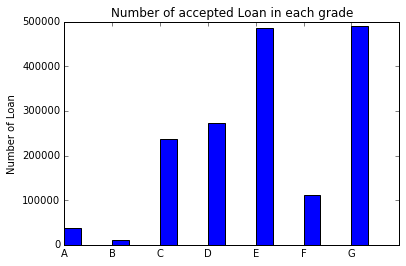

In [13]:

N = len(grade_acc)
ind = np.arange(N)    # the x locations for the groups
width = 0.35 
plt.bar(ind, grade_y, width)
plt.ylabel('Number of Loan')
plt.title('Number of accepted Loan in each grade')
plt.xticks(ind, ('A', 'B', 'C', 'D', 'E', 'F', 'G'))
plt.show()

In [14]:
# This tells me the number of loans in each catagory. 